In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import  ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

#import WARNING
import warnings
warnings.filterwarnings('ignore')

In [ ]:
forest=pd.read_csv('/content/forestfires.csv')

## Data Exploration


In [ ]:
forest

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forest.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
forest.shape

(517, 31)

## Missing Value

In [ ]:
forest.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

There is no missing values

---



---



## Duplicated Values

In [ ]:
forest.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
512    False
513    False
514    False
515    False
516    False
Length: 517, dtype: bool

In [ ]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [ ]:
forest.drop_duplicates(inplace=True)

In [ ]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category


In [ ]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [ ]:
raw_data = forest[['month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area','size_category']]

In [ ]:
raw_data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


## Numerical Variables

Numerical variables are usually of 2 types that is
Continuous variable and discrete variable

In [ ]:
# List of Numerical Variables
numerical =[feature for feature in raw_data.columns if raw_data[feature].dtypes != 'O']

print('Number of numerical variables:', len(numerical))

# Visualize the numerical variables
raw_data[numerical].head()

Number of numerical variables: 9


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
discrete=[feature for feature in numerical if len(raw_data[feature].unique())<25]
print('Discrete Variables Count: {}'.format(len(discrete)))


continuous=[feature for feature in numerical if feature not in discrete]
print('Continuous Feature Count {}'.format(len(continuous)))

Discrete Variables Count: 2
Continuous Feature Count 7


In [ ]:
# find categorical variables

categorical = [var for var in raw_data.columns if raw_data[var].dtype=='O']

print(len(categorical))

print('The categorical variables are :\n\n', categorical)

3
The categorical variables are :

 ['month', 'day', 'size_category']


In [ ]:
for var in categorical: 
    
    print(raw_data[var].value_counts())

aug    178
sep    172
mar     53
jul     32
feb     20
jun     16
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64
sun    94
fri    83
sat    82
mon    74
tue    63
thu    60
wed    53
Name: day, dtype: int64
small    371
large    138
Name: size_category, dtype: int64


In [ ]:
raw_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


## Data Visualization

<Axes: >

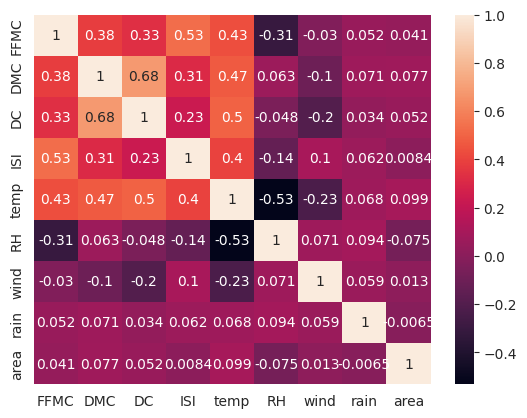

In [ ]:
sns.heatmap(raw_data.corr(), annot=True)

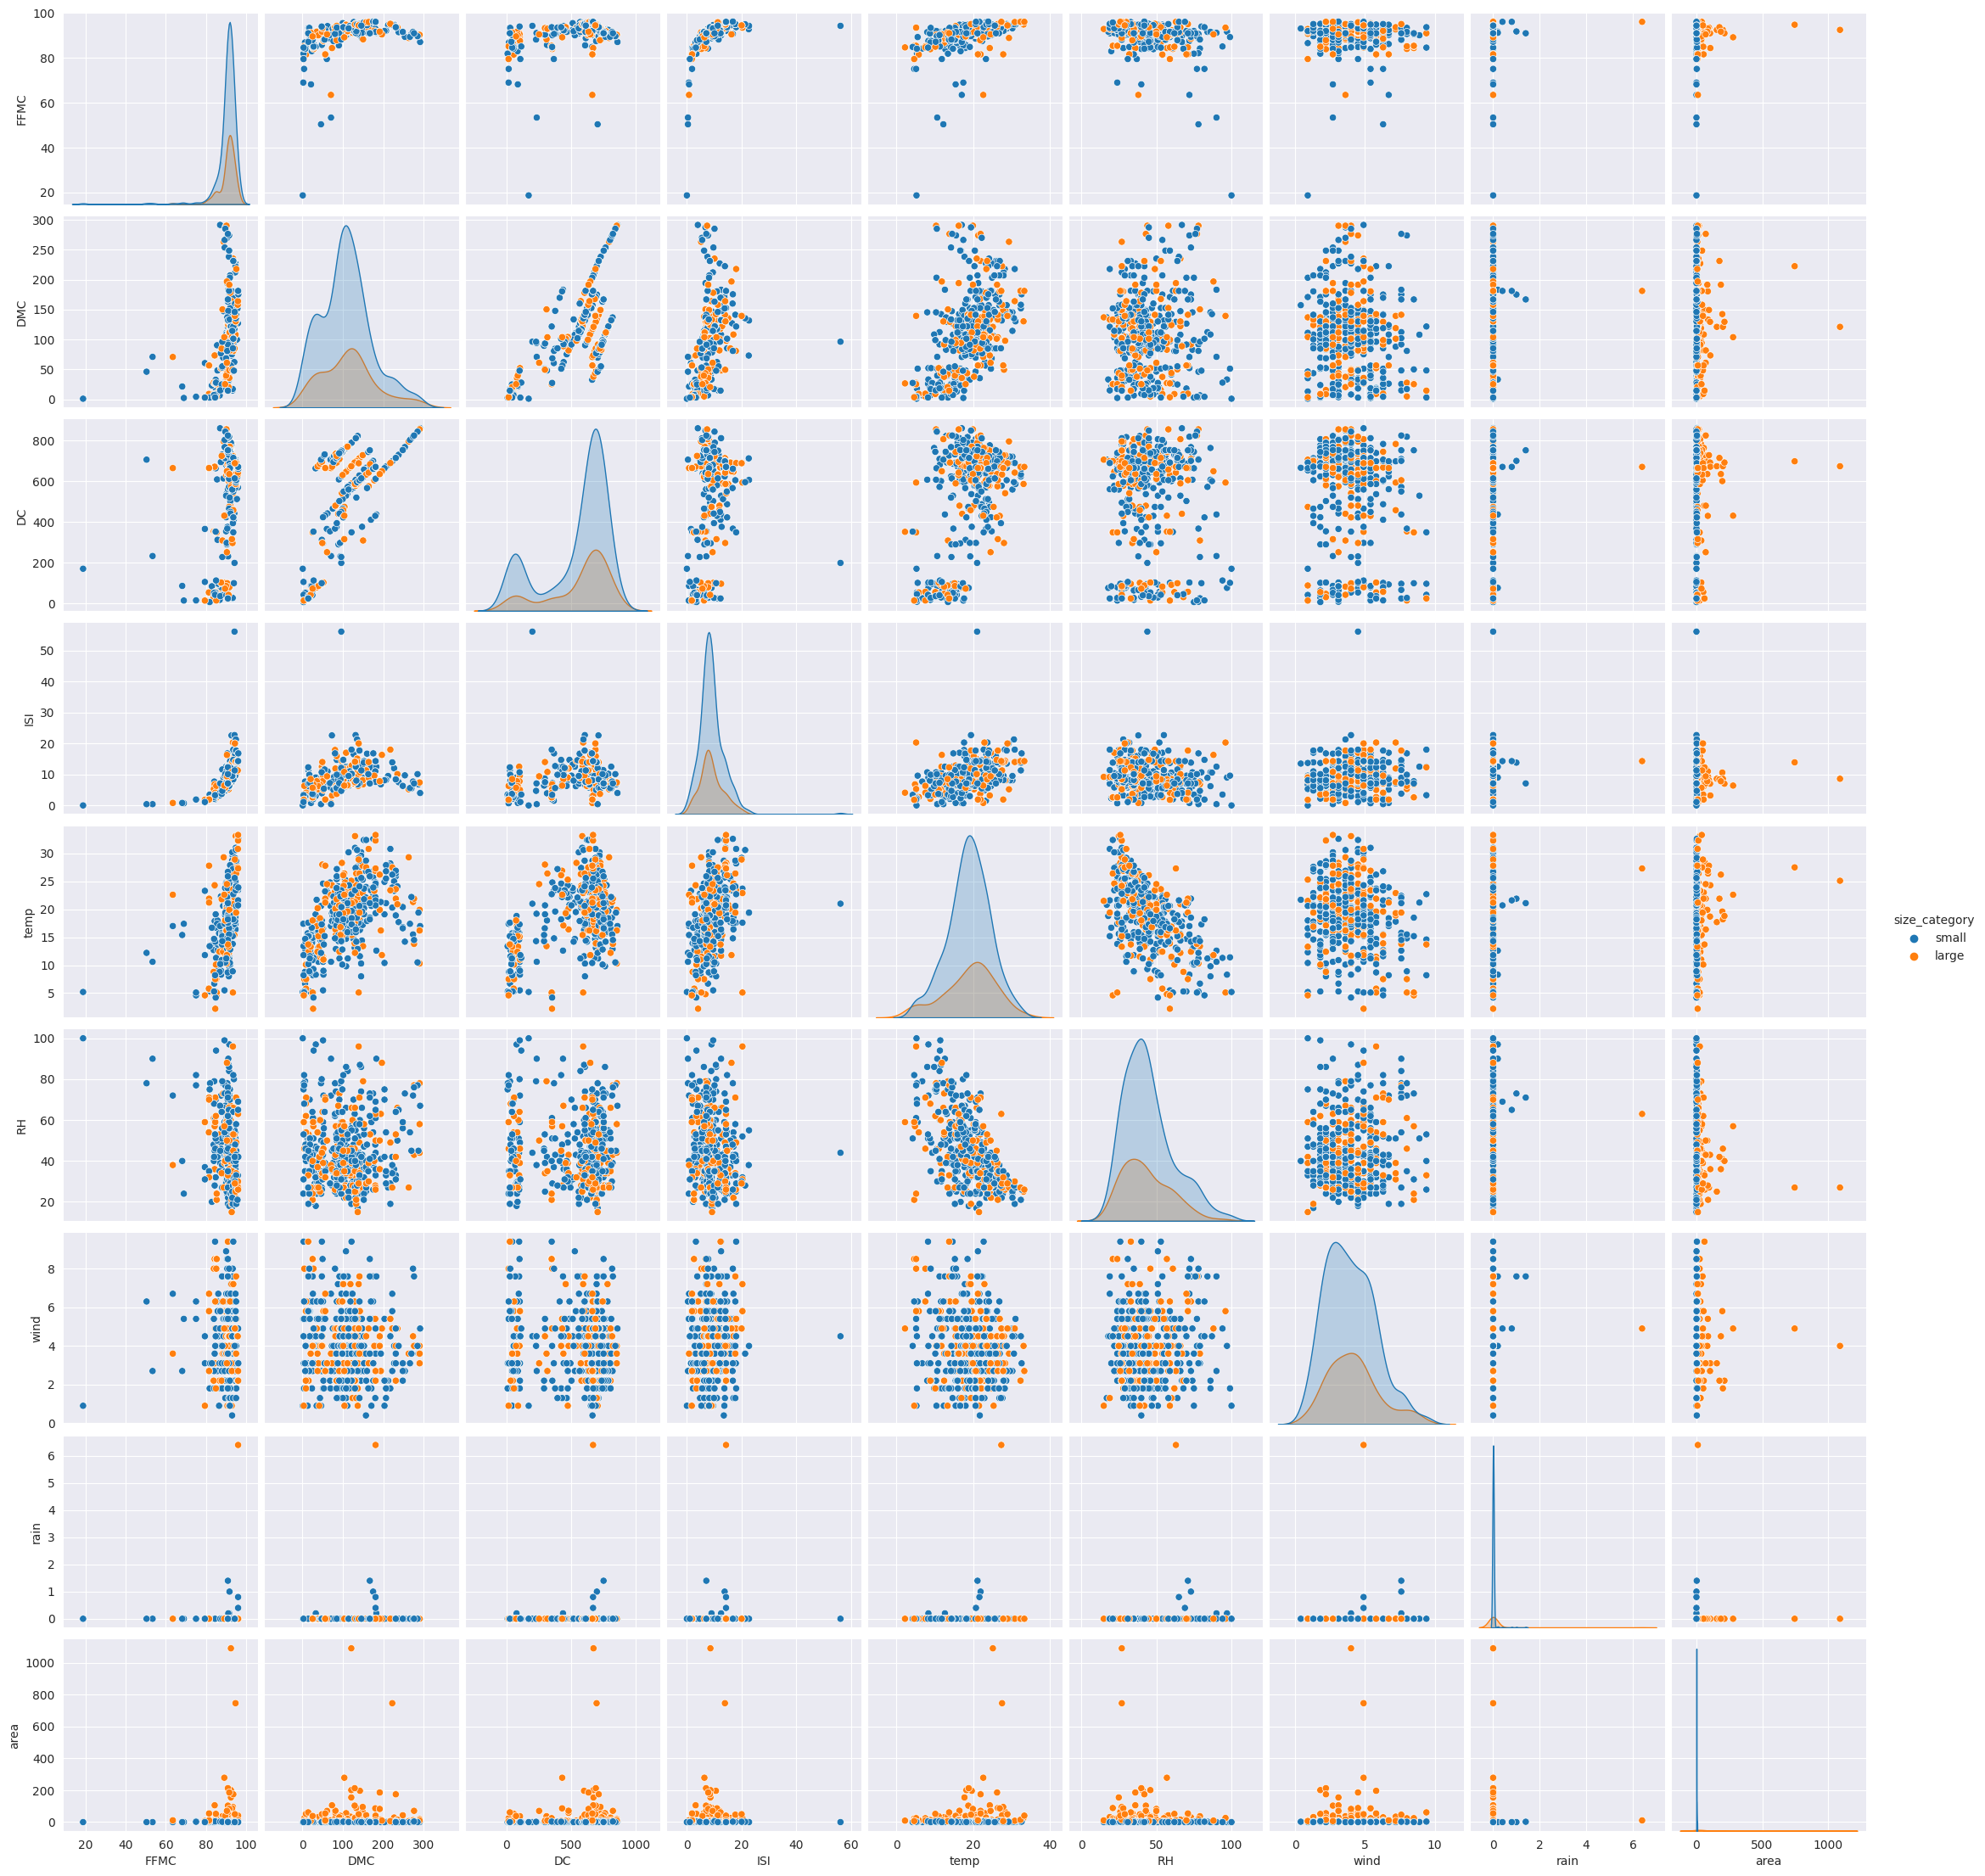

In [ ]:
sns.set_style('darkgrid')
sns.pairplot(raw_data, hue='size_category')
plt.show()

#Univariate plots

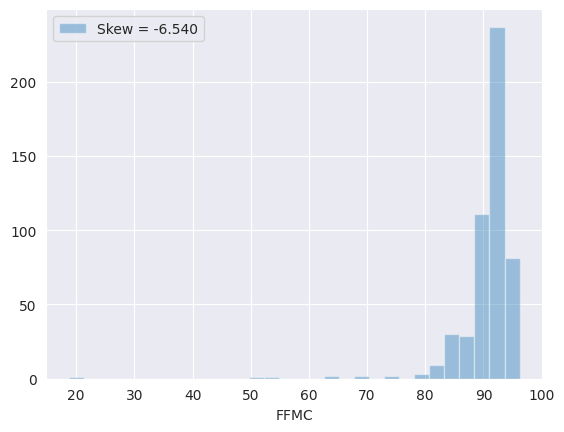

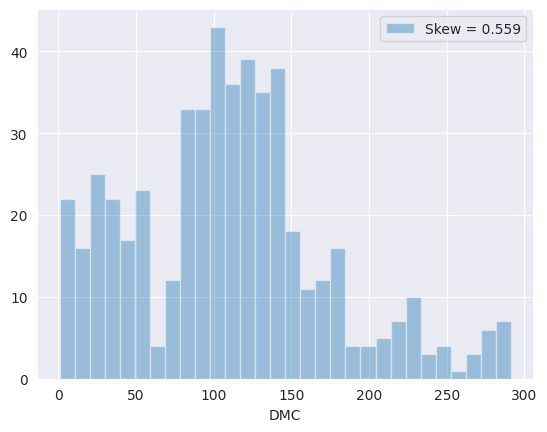

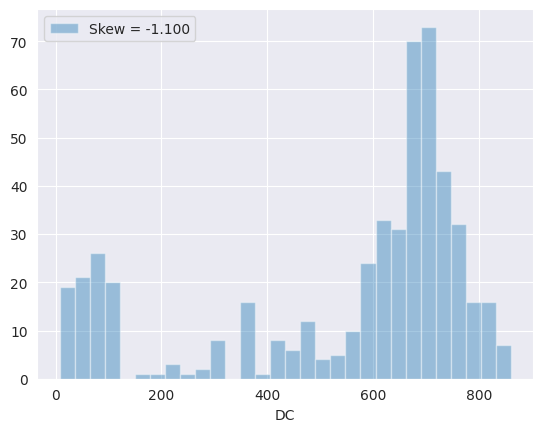

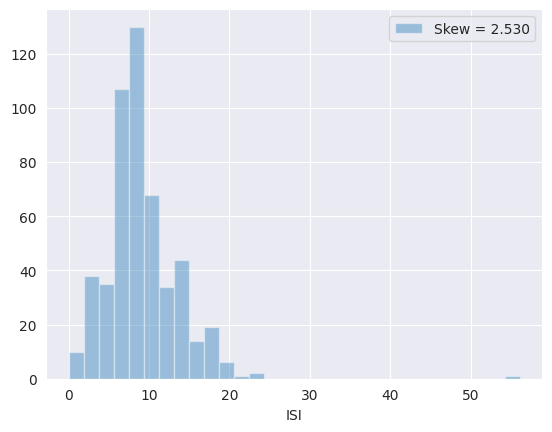

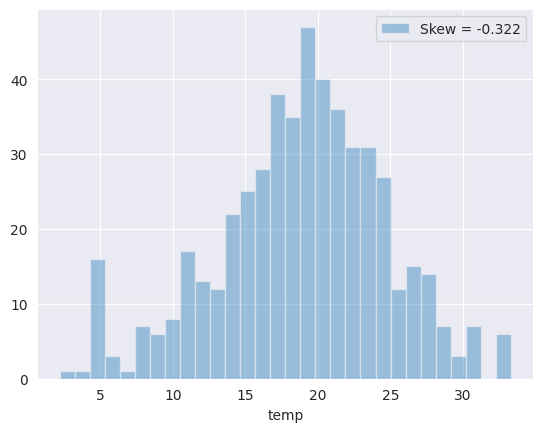

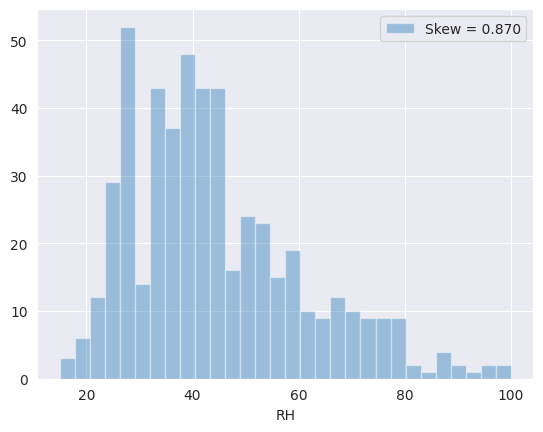

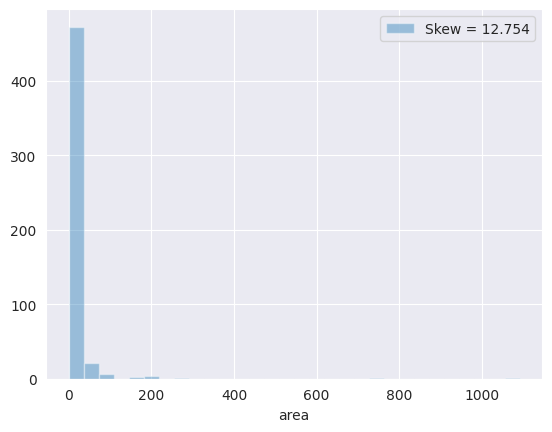

In [ ]:
#Univariate plots
for r in continuous:
    skew = raw_data[r].skew()
    sns.distplot(raw_data[r], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

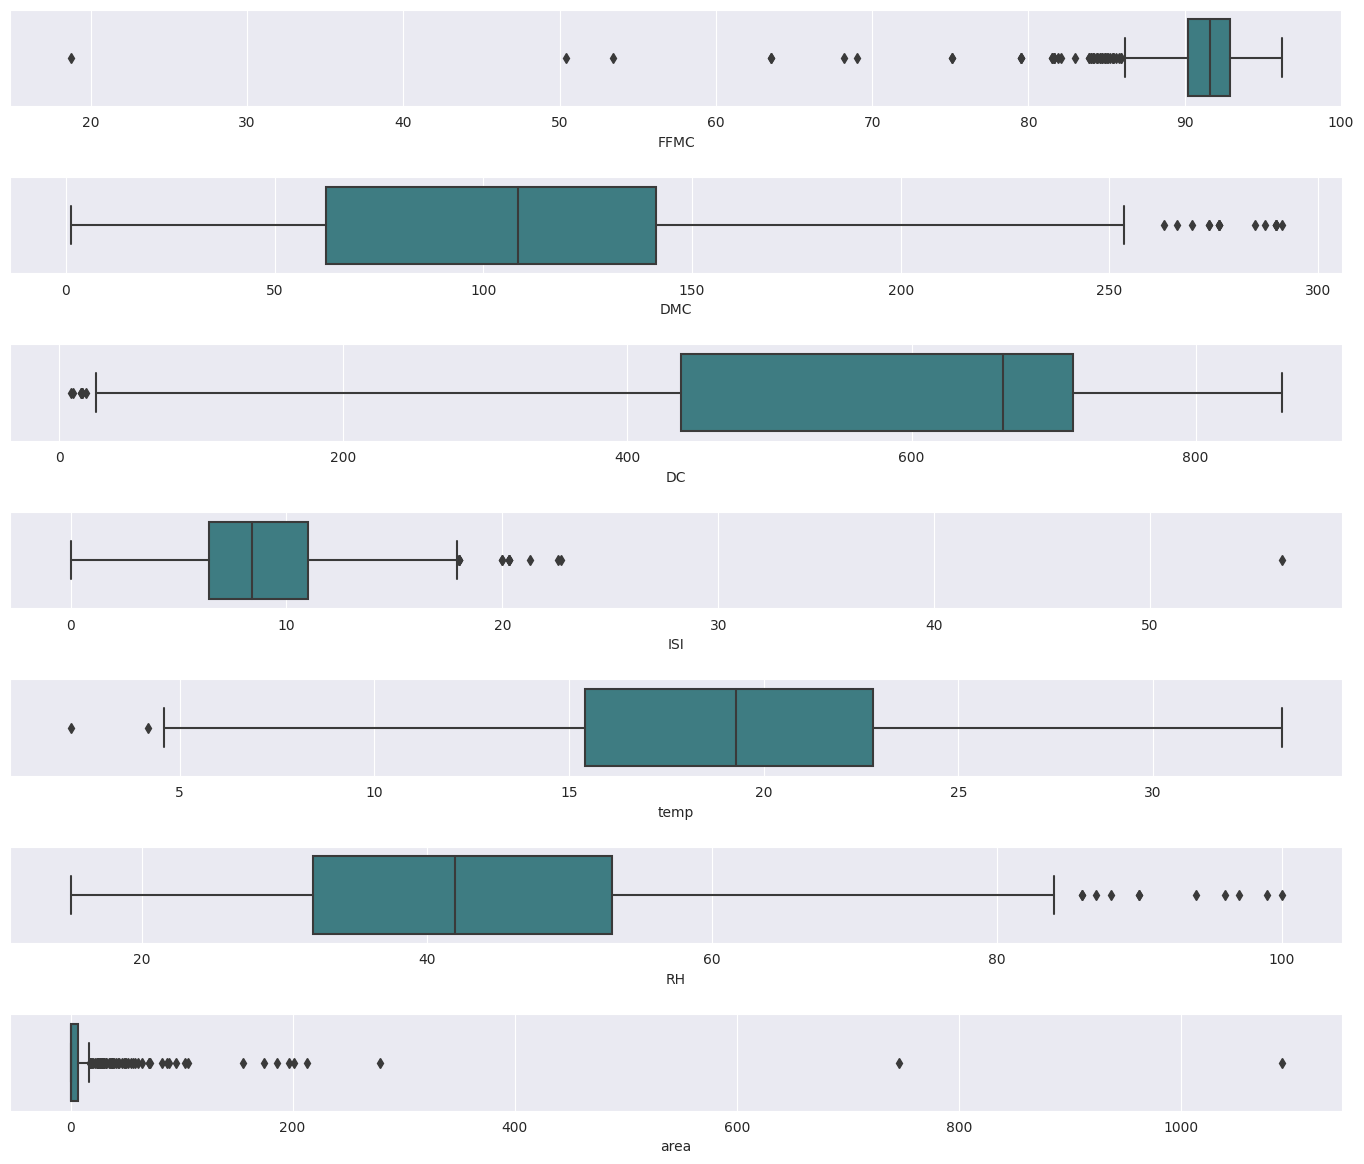

In [ ]:
#outliers
ot=raw_data.copy() 
fig, axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=ot,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

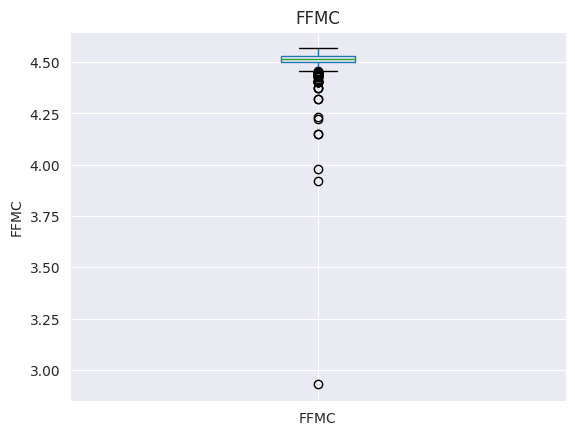

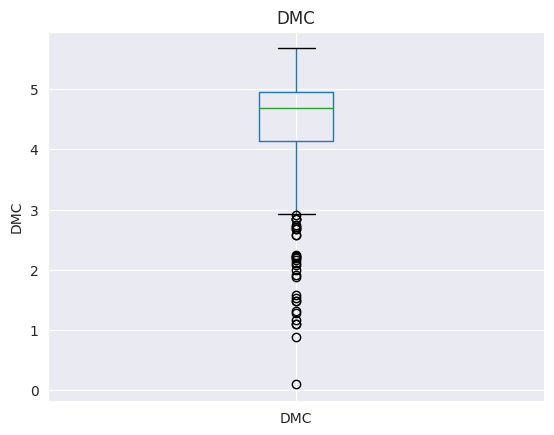

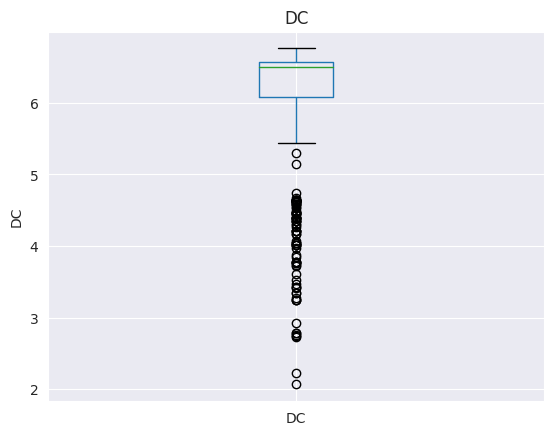

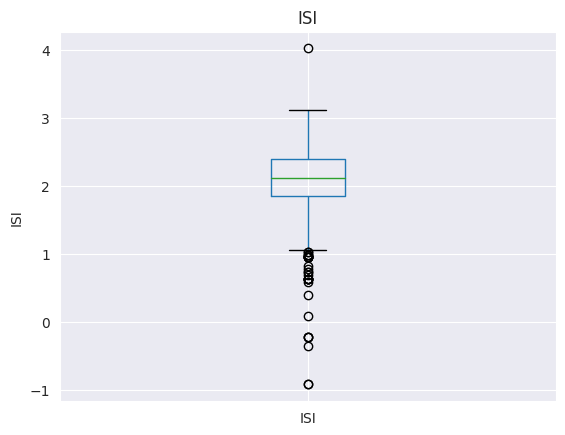

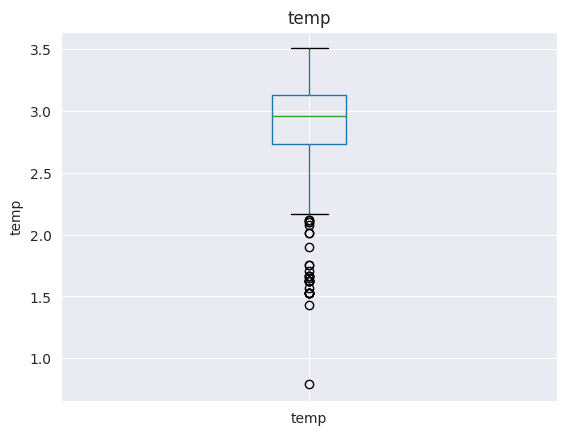

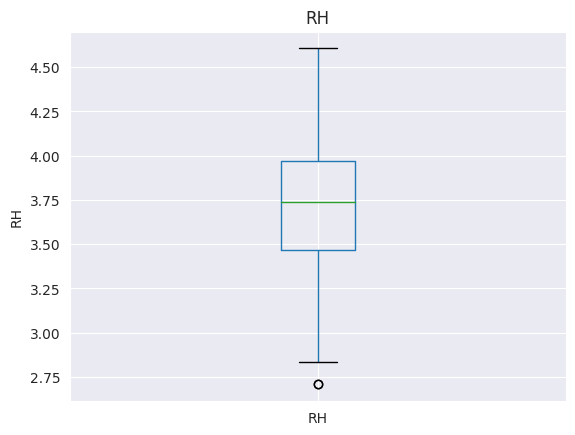

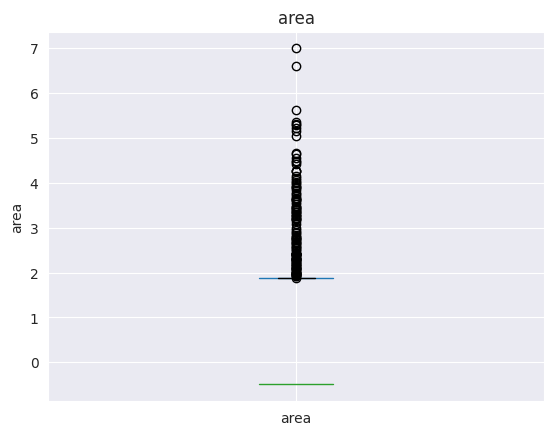

In [ ]:
#after log transformation
for feature in continuous:
    data=raw_data.copy()
    data[feature]=np.log(data[feature])
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Categorical variables

In [ ]:
categorical_features=[feature for feature in raw_data.columns if raw_data[feature].dtype=='O']
print('Number of Categorical Features:',len(categorical_features), '\n', categorical_features)
raw_data[categorical_features].head()

Number of Categorical Features: 3 
 ['month', 'day', 'size_category']


,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


In [ ]:
for feature in categorical_features:
    print("{} number of unique categories in feature named {}".format(len(raw_data[feature].unique()),feature))

12 number of unique categories in feature named month
7 number of unique categories in feature named day
2 number of unique categories in feature named size_category


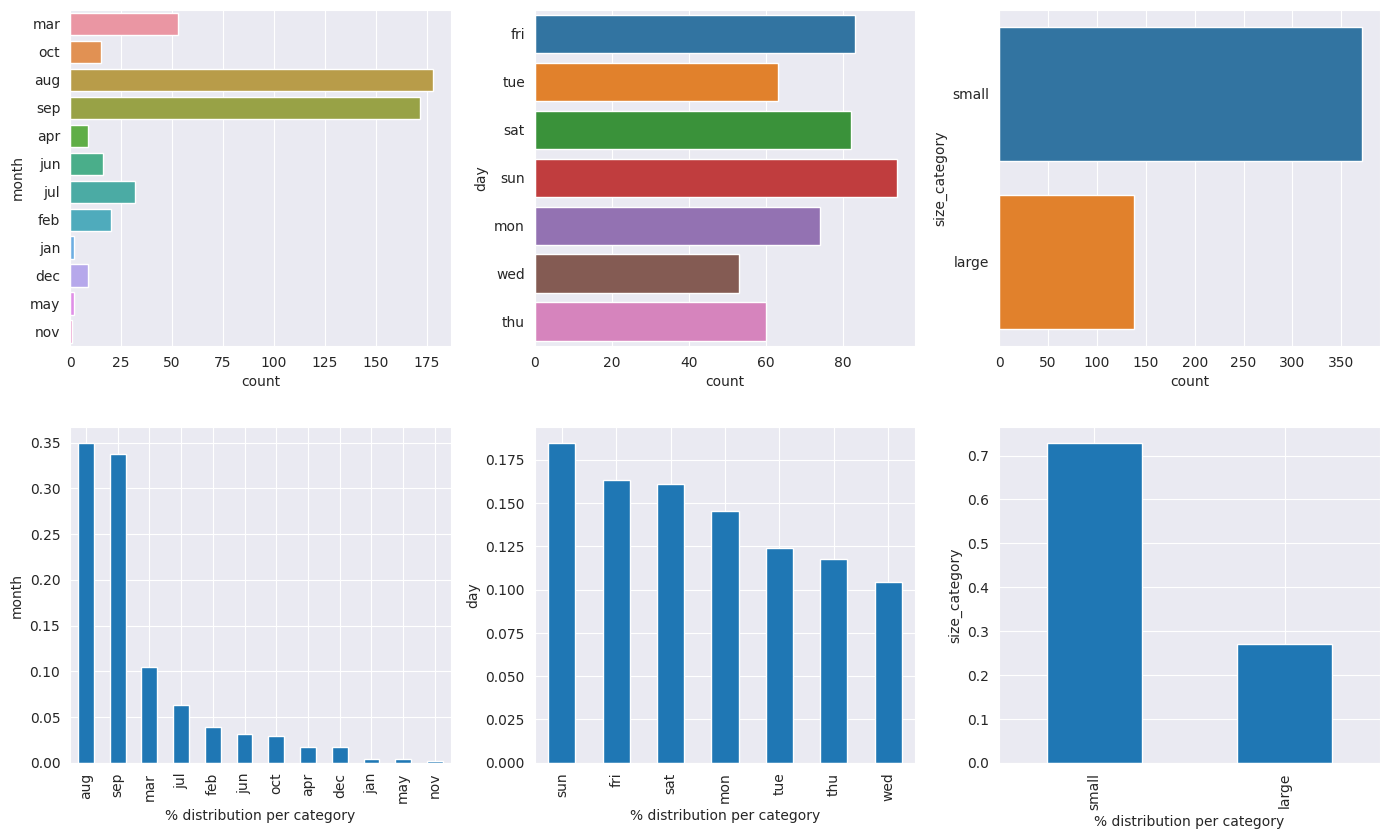

In [ ]:
# analyzing categorical columns
plt.figure(figsize=(14,12))
for i,col in enumerate(categorical_features,1):
    plt.subplot(3,3,i)
    sns.countplot(data=raw_data,y=col)
    plt.subplot(3,3,i+3)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()

## Bivariate Analysis

In [ ]:
print(raw_data['area'].describe(),'\n')
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
df=raw_data.copy()
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

count     509.000000
mean       12.992908
std        64.133357
min         0.000000
25%         0.000000
50%         0.610000
75%         6.580000
max      1090.840000
Name: area, dtype: float64 



,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,damage_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small,No damage
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small,No damage
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small,No damage
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small,No damage
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small,No damage


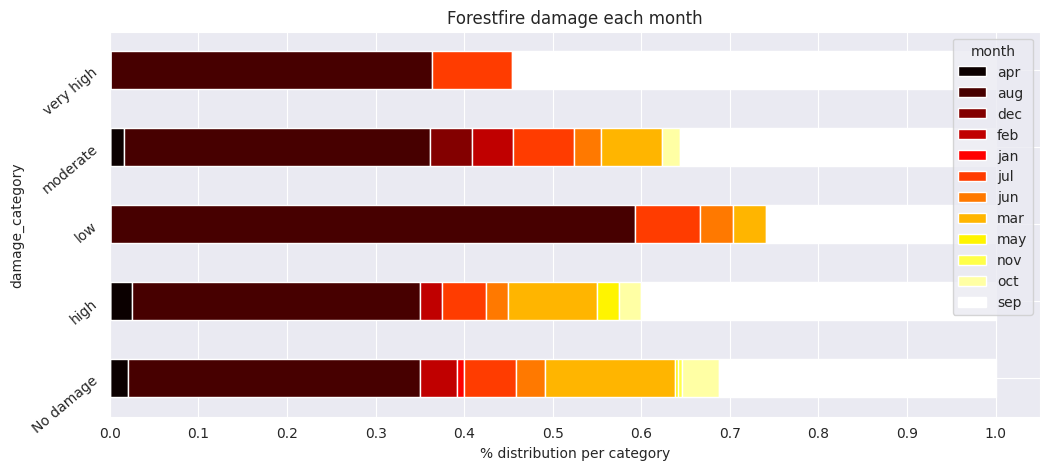

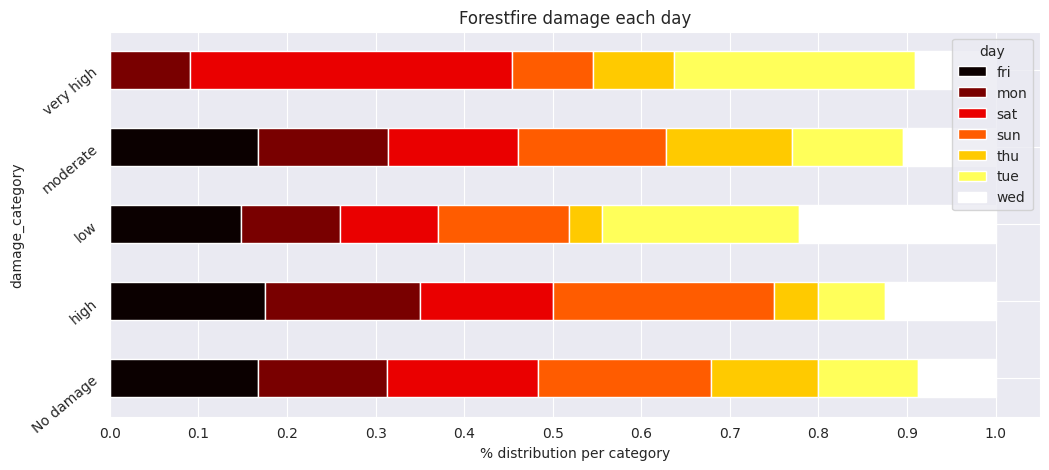

In [ ]:
for col in categorical_features:
    if col!="size_category":
        cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
        cross.plot.barh(stacked=True,rot=40,cmap='hot',figsize=(12, 5))
        plt.xlabel('% distribution per category')
        plt.xticks(np.arange(0,1.1,0.1))
        plt.title("Forestfire damage each {}".format(col))
        
plt.show()


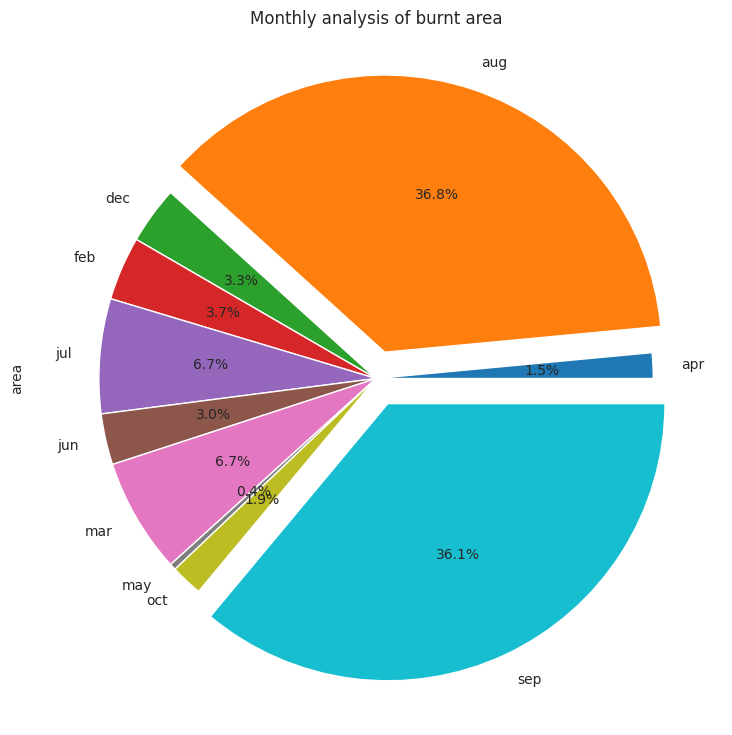

In [ ]:
# monthly analysis of burnt area, where the condition is: area>0
areaburnt=raw_data[raw_data['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()


## Analysis of the response column

Checking for Imbalanced or balanced dataset

In [ ]:
raw_data.size_category.unique()

array(['small', 'large'], dtype=object)

In [ ]:
raw_data.size_category.value_counts()


small    371
large    138
Name: size_category, dtype: int64

 Data Pre-Processing

In [ ]:
df1 = forest[['month','day','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'size_category']]

In [ ]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [ ]:
df2 = df1.copy()
df2.drop('size_category',axis=1, inplace =True)
df2 = pd.get_dummies(df2.iloc[:,:])
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,1,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,1,0,0,0,1,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df2['size_category'] = df1.size_category
df2['size_category'] = np.where(df2['size_category'].str.contains("large"), 1, 0)
df2.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_apr,...,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,1,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,1,0,0,0,1,0,0,0,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


# Test Train Split Dataset

In [ ]:
x=df2.drop('size_category', axis=1)
y=df2['size_category']

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=10)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (356, 28)
Shape of X_test:  (153, 28)
Shape of y_train:  (356,)
Shape of y_test (153,)


Model building

In [ ]:
clf =SVC()
param_grid = [{'kernel':['rbf','sigmoid'], 'gamma':[0.1,0.01,0.001,0.0001],
               'C':[4,3,2,1,0.1,0.01,0.001,0.0001]}]


gsv=GridSearchCV(clf, param_grid, cv=5)
gsv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [4, 3, 2, 1, 0.1, 0.01, 0.001, 0.0001],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}])

In [ ]:
gsv.best_params_ , gsv.best_score_

({'C': 4, 'gamma': 0.0001, 'kernel': 'rbf'}, 0.8539514866979656)

Using rbf kernel

In [ ]:
clf = SVC(kernel='rbf',C= 3, gamma = 0.0001)
clf.fit(x_train , y_train)
y_pred_train= clf.predict(x_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 88.48314606741573
[[261   1]
 [ 40  54]]


In [ ]:
y_pred_test = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 87.58169934640523
[[108   1]
 [ 18  26]]
